# Train and compare configurations

In [1]:
from medigraph.train_multiple_models import train_multiple_configurations as train
from medigraph.model.metrics import plot_metrics, analyze_metrics
from medigraph.utils import retrieve_metrics
from medigraph.data.properties import NORMALIZED_INPUTS, RFE_DIM_REDUCTION
RFE = RFE_DIM_REDUCTION
INP = NORMALIZED_INPUTS
from medigraph import root_dir
from pathlib import Path
from texttable import Texttable
import latextable
import torch
%load_ext autoreload
%autoreload 2

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
n_epochs = 1000
features_selection = ["rfe", "normalized_inputs"]
models_list = ["Dense", "Single-h=16", "GCN-dr=0.1"]
output_folder = root_dir/"results"
assert output_folder.exists(), "Output folder does not exist"

In [ ]:
metric_dict = train(
    models_list=models_list,
    device=device,
    n_epochs=n_epochs,
    features_selection_list=features_selection,
    output_folder=output_folder
)

In [ ]:
res = analyze_metrics(
    metric_dict,
    plot_flag=True,
    figsize=(10, 10),
    title="Models performance comparison with regard to features selection"
)

# Report metrics as a latex table

In [4]:
metric_dict = retrieve_metrics(
    config_list=[
        ("Single-h=4", INP), ("Single-h=4", RFE),
        ("Single-h=16", INP), ("Single-h=16", RFE),
        ("Single-h=128", INP), ("Single-h=128", RFE),
        ("Dense", INP), ("Dense", RFE),
    ]
)

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


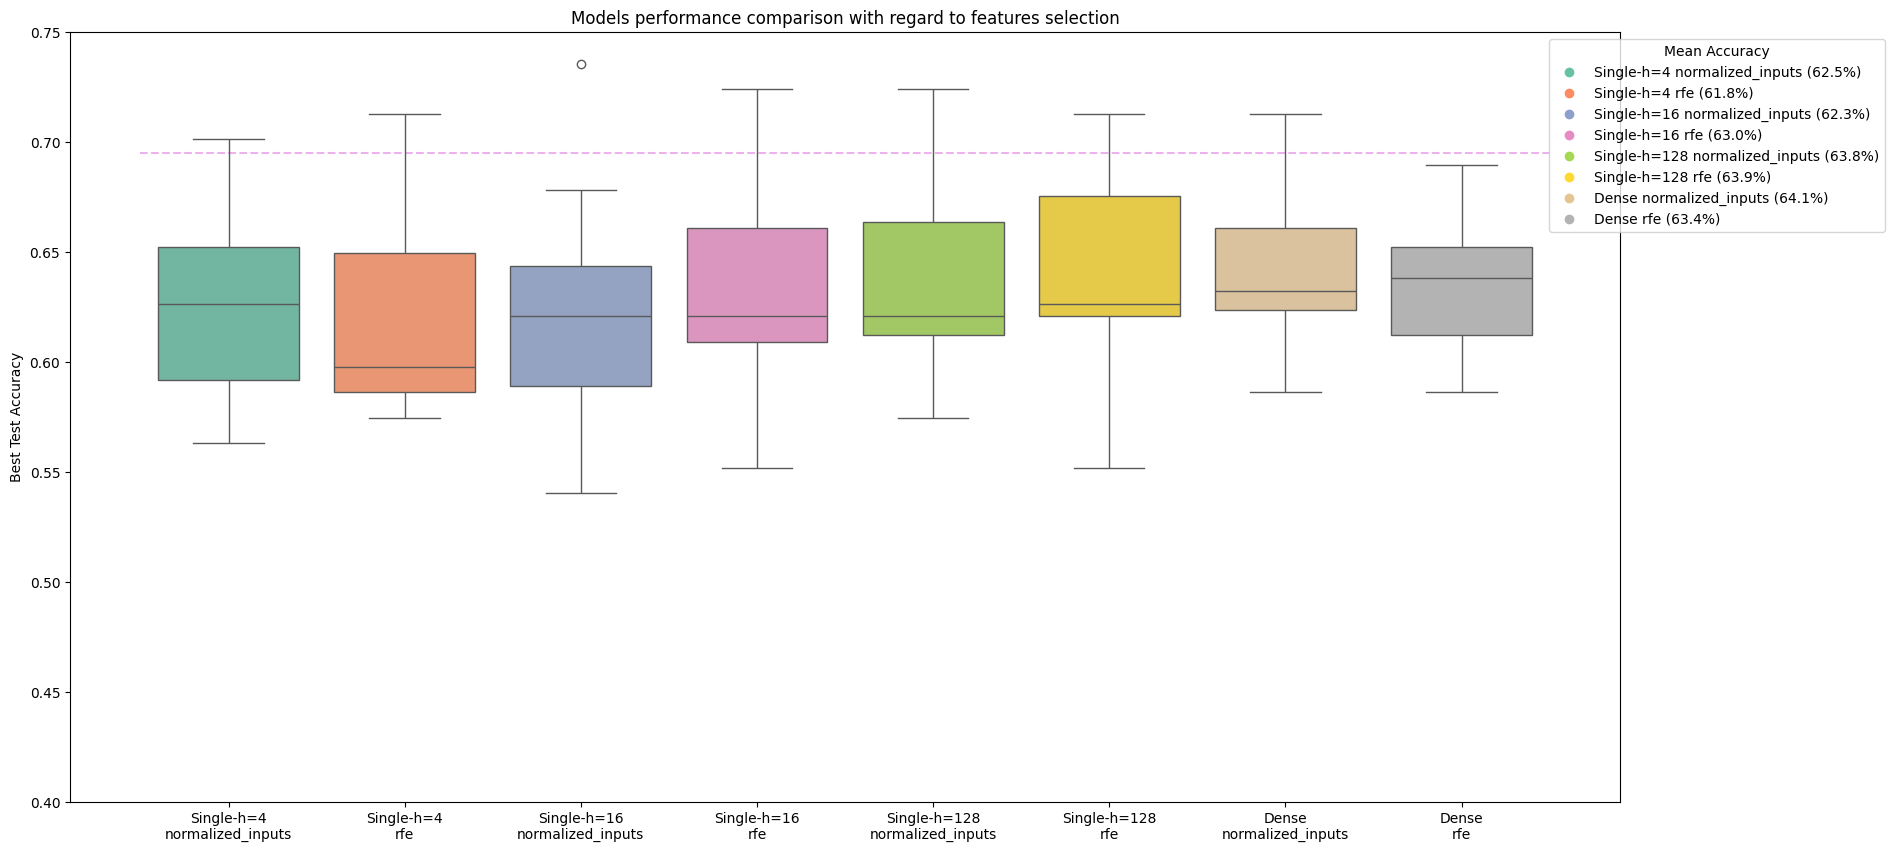

In [24]:
res = analyze_metrics(
    metric_dict,
    plot_flag=True,
    figsize=(20, 10),
    title="Models performance comparison with regard to features selection"
)

In [22]:

table = Texttable()
table.set_deco(Texttable.HEADER)
header = ["Model", "Feature", "Test accuracy"]
table_content = []
for model_key, model in res.items():
    model_name = model_key.split(" ")[0]
    feature_type = model_key.split(" ")[1].replace("_", " ")
    table_content.append([
        model_name,
        feature_type,
        f"{100.*model['mean_test_accuracy']:.1f} +/- {100*model['std_test_accuracy']:.1f}\%"
    ])
table.add_rows([
    header,
    *table_content
])
print(table.draw())
print(latextable.draw_latex(table, caption="Impact of feature reduction", label="table:input_features_reduction"))

   Model            Feature        Test accuracy 
Single-h=4     normalized inputs   62.5 +/- 4.2\%
Single-h=4     rfe                 61.8 +/- 4.4\%
Single-h=16    normalized inputs   62.3 +/- 5.4\%
Single-h=16    rfe                 63.0 +/- 5.1\%
Single-h=128   normalized inputs   63.8 +/- 4.3\%
Single-h=128   rfe                 63.9 +/- 4.6\%
Dense          normalized inputs   64.1 +/- 3.4\%
Dense          rfe                 63.4 +/- 3.3\%
\begin{table}
	\begin{center}
		\begin{tabular}{lll}
			Model & Feature & Test accuracy \\
			\hline
			Single-h=4 & normalized inputs & 62.5 +/- 4.2\% \\
			Single-h=4 & rfe & 61.8 +/- 4.4\% \\
			Single-h=16 & normalized inputs & 62.3 +/- 5.4\% \\
			Single-h=16 & rfe & 63.0 +/- 5.1\% \\
			Single-h=128 & normalized inputs & 63.8 +/- 4.3\% \\
			Single-h=128 & rfe & 63.9 +/- 4.6\% \\
			Dense & normalized inputs & 64.1 +/- 3.4\% \\
			Dense & rfe & 63.4 +/- 3.3\% \\
		\end{tabular}
	\end{center}
	\caption{Impact of feature reduction}
	\label{

In [ ]:
# table = Texttable()
# table.set_deco(Texttable.HEADER)
# table.add_rows([
#     ["Model"] + [v.split(" ")[0] for v in list(res.keys())],
#     ["Feature"] + [v.split(" ")[1].replace("_", " ") for v in list(res.keys())],
#     ["Accuracy"] + [f"{100.*v['mean_test_accuracy']:.1f} +/- {100*v['std_test_accuracy']:.1f}" for v in res.values()],
# ])
# print(table.draw())
# print(latextable.draw_latex(table, caption="Comparison of ", label="table:input_features_reduction"))

# Plot training metrics evolution across epochs

In [ ]:
plot_metrics(metric_dict, figsize=(30, 20))